In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as dr
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [70]:
spy= dr.DataReader('SPY',data_source='yahoo',start='2007-1-1')

<AxesSubplot:xlabel='Date'>

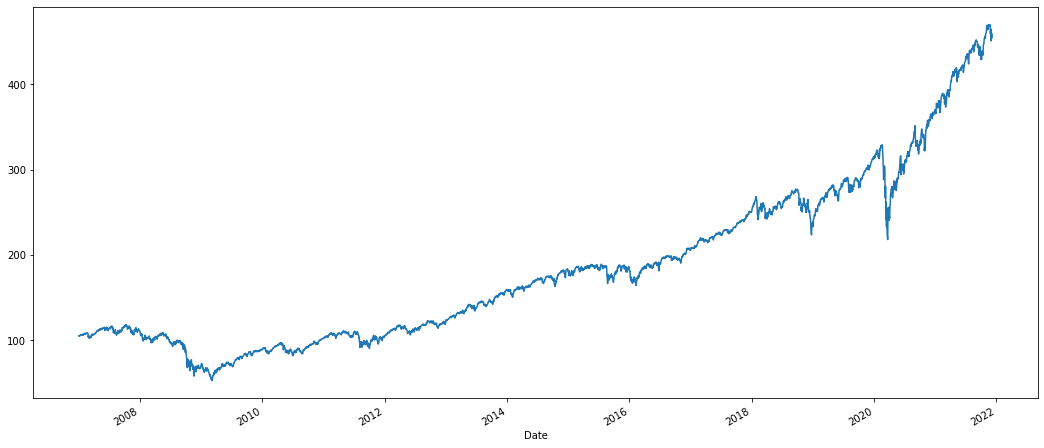

In [73]:
spy.get('Adj Close').plot(kind='line',figsize=(18,8))

In [74]:
spy_normalized= np.array(spy.get('Adj Close'))
spy_normalized=spy_normalized.reshape(-1,1)

In [75]:
scaler= MinMaxScaler()

In [76]:
scaler.fit(spy_normalized)

MinMaxScaler()

In [77]:
clean_data=scaler.fit_transform(spy_normalized)
clean_data

array([[0.12588337],
       [0.12642028],
       [0.1243978 ],
       ...,
       [0.97041348],
       [0.96086331],
       [0.9737489 ]])

In [78]:
spy= spy.assign(clean=clean_data)

In [79]:
spy= spy.fillna(spy.mean())

In [206]:
train_data= spy[:2500]

In [207]:
test_data= spy[2500:]

<AxesSubplot:xlabel='Date'>

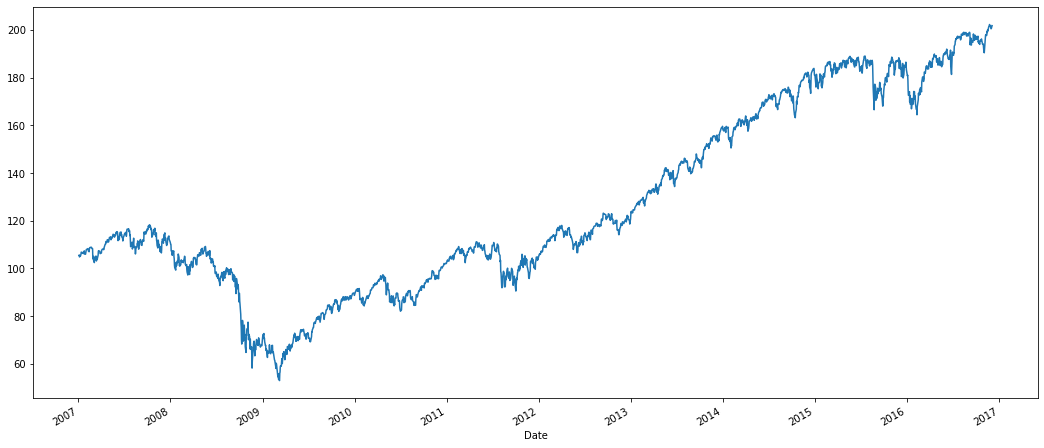

In [208]:
train_data.get('Adj Close').plot(kind='line',figsize=(18,8))

<AxesSubplot:xlabel='Date'>

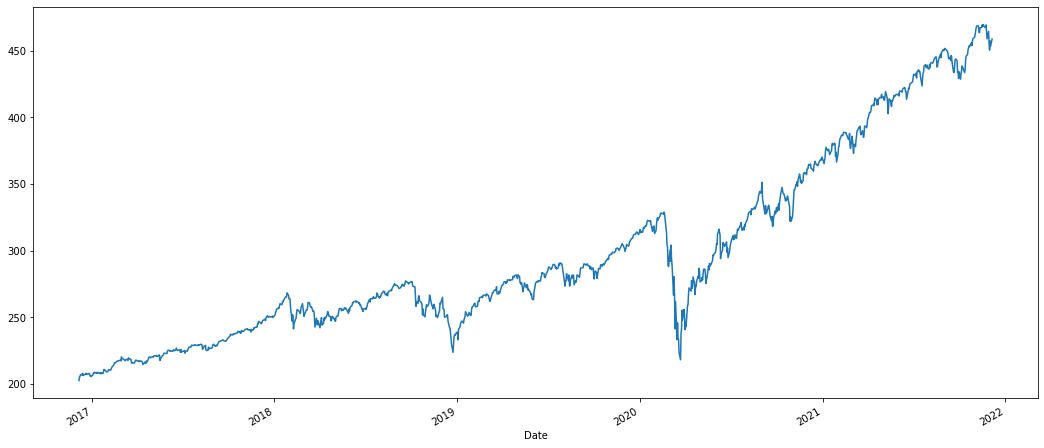

In [209]:
test_data.get('Adj Close').plot(kind='line',figsize=(18,8))

In [210]:
train_data2=np.array(train_data.get('clean'))

In [211]:
train_data2

array([0.12588337, 0.12642028, 0.1243978 , ..., 0.35392661, 0.35416757,
       0.35705962])

In [212]:
train_data2 =np.array(train_data.get('clean'))

In [213]:
test_data2= np.array(test_data.get('clean'))

In [214]:
time_step=100

In [215]:
train_data2 =train_data2.reshape(train_data2.shape[0],1)

In [216]:
test_data2 =test_data2.reshape(len(test_data2),1)

<AxesSubplot:xlabel='Date'>

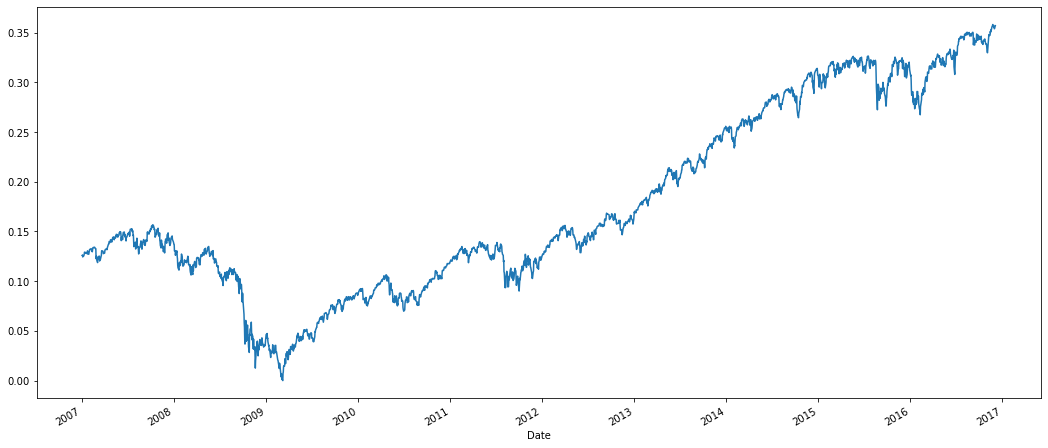

In [217]:
train_data.get('clean').plot(kind='line',figsize=(18,8))

<AxesSubplot:xlabel='Date'>

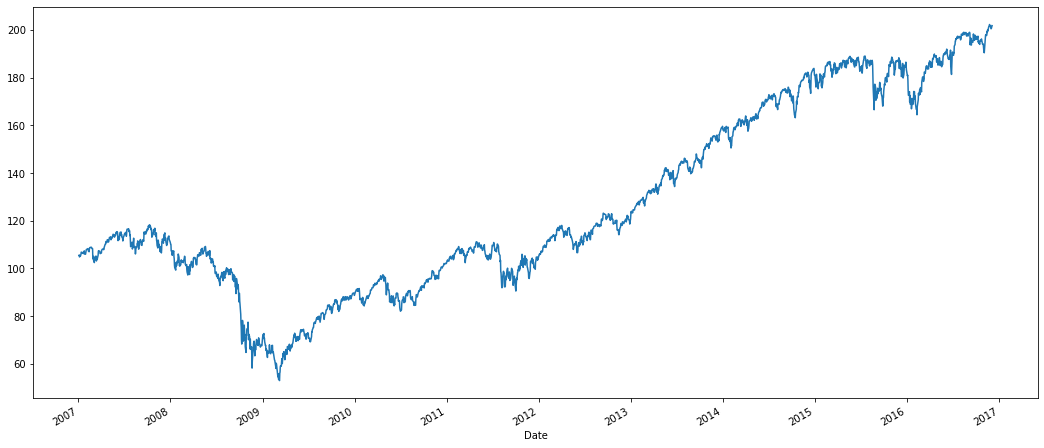

In [218]:
train_data.get('Adj Close').plot(kind='line',figsize=(18,8))

In [221]:
X_train = []
y_train = []
for i in range(60, 2500):
    X_train.append(spy.iloc[i-60:i, 6])
    y_train.append(spy.iloc[i, 6])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [222]:
# model=Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
77/77 [==============================] - 11s 81ms/step - loss: 0.0024
Epoch 2/100
77/77 [==============================] - 8s 106ms/step - loss: 5.1478e-04
Epoch 3/100
77/77 [==============================] - 8s 105ms/step - loss: 4.4956e-04
Epoch 4/100
77/77 [==============================] - 8s 104ms/step - loss: 3.8575e-04
Epoch 5/100
77/77 [==============================] - 8s 105ms/step - loss: 3.7900e-04
Epoch 6/100
77/77 [==============================] - 8s 104ms/step - loss: 3.5368e-04
Epoch 7/100
77/77 [==============================] - 8s 105ms/step - loss: 3.8318e-04
Epoch 8/100
77/77 [==============================] - 8s 103ms/step - loss: 3.5803e-04
Epoch 9/100
77/77 [==============================] - 8s 103ms/step - loss: 2.8506e-04
Epoch 10/100
77/77 [==============================] - 8s 104ms/step - loss: 3.1004e-04
Epoch 11/100
77/77 [==============================] - 8s 104ms/step - loss: 2.6768e-04
Epoch 12/100
77/77 [==============================] - 8s

77/77 [==============================] - 8s 104ms/step - loss: 1.1083e-04
Epoch 96/100
77/77 [==============================] - 8s 103ms/step - loss: 1.1727e-04
Epoch 97/100
77/77 [==============================] - 8s 106ms/step - loss: 9.9943e-05
Epoch 98/100
77/77 [==============================] - 8s 103ms/step - loss: 1.0174e-04
Epoch 99/100
77/77 [==============================] - 8s 104ms/step - loss: 1.1958e-04
Epoch 100/100
77/77 [==============================] - 8s 104ms/step - loss: 1.1280e-04


In [224]:
X_train

array([[[0.12588337],
        [0.12642028],
        [0.1243978 ],
        ...,
        [0.12956431],
        [0.12769566],
        [0.12796503]],

       [[0.12642028],
        [0.1243978 ],
        [0.12556116],
        ...,
        [0.12769566],
        [0.12796503],
        [0.12801902]],

       [[0.1243978 ],
        [0.12556116],
        [0.12534644],
        ...,
        [0.12796503],
        [0.12801902],
        [0.12830648]],

       ...,

       [[0.35028799],
        [0.34919806],
        [0.337797  ],
        ...,
        [0.35592044],
        [0.35686252],
        [0.3557013 ]],

       [[0.34919806],
        [0.337797  ],
        [0.34446753],
        ...,
        [0.35686252],
        [0.3557013 ],
        [0.35392661]],

       [[0.337797  ],
        [0.34446753],
        [0.33768785],
        ...,
        [0.3557013 ],
        [0.35392661],
        [0.35416757]]])

In [225]:
train_predict=model.predict(test_data2)
train_predict=scaler.inverse_transform(train_data2)

In [226]:
train_data2

array([[0.12588337],
       [0.12642028],
       [0.1243978 ],
       ...,
       [0.35392661],
       [0.35416757],
       [0.35705962]])

In [227]:
train_predict

array([[105.4467392 ],
       [105.67049408],
       [104.82763672],
       ...,
       [200.48249817],
       [200.58291626],
       [201.78816223]])

In [228]:
test_data2

array([[0.35859339],
       [0.3649471 ],
       [0.36615214],
       ...,
       [0.97041348],
       [0.96086331],
       [0.9737489 ]])

In [229]:
spy

,High,Low,Open,Close,Volume,Adj Close,clean,predicted
Date,,,,,,,,
2007-01-03,142.860001,140.570007,142.250000,141.369995,94807600.0,105.446739,0.125883,105.446739
2007-01-04,142.050003,140.610001,141.229996,141.669998,69620600.0,105.670494,0.126420,105.670494
2007-01-05,141.399994,140.380005,141.330002,140.539993,76645300.0,104.827637,0.124398,104.827637
2007-01-08,141.410004,140.250000,140.820007,141.190002,71655000.0,105.312462,0.125561,105.312462
2007-01-09,141.600006,140.399994,141.309998,141.070007,75680100.0,105.222977,0.125346,105.222977
...,...,...,...,...,...,...,...,...
2021-11-30,464.029999,455.299988,462.000000,455.559998,148559600.0,455.559998,0.965998,455.559998
2021-12-01,464.670013,450.290009,461.640015,450.500000,131939200.0,450.500000,0.953857,450.500000
2021-12-02,459.070007,450.309998,450.730011,457.399994,127637800.0,457.399994,0.970413,457.399994


In [230]:
test_predict=model.predict(test_data2)
test_predict=scaler.inverse_transform(test_data2)

In [231]:
test_predict

array([[202.42735291],
       [205.07522583],
       [205.5774231 ],
       ...,
       [457.3999939 ],
       [453.42001343],
       [458.79000854]])

In [232]:
predicted_results=np.append( train_predict,test_predict)

In [233]:
predicted_results

array([105.4467392 , 105.67049408, 104.82763672, ..., 457.3999939 ,
       453.42001343, 458.79000854])

In [234]:
len(predicted_results)

3759

In [235]:
spy= spy.assign(predicted=predicted_results)

In [236]:
spy

,High,Low,Open,Close,Volume,Adj Close,clean,predicted
Date,,,,,,,,
2007-01-03,142.860001,140.570007,142.250000,141.369995,94807600.0,105.446739,0.125883,105.446739
2007-01-04,142.050003,140.610001,141.229996,141.669998,69620600.0,105.670494,0.126420,105.670494
2007-01-05,141.399994,140.380005,141.330002,140.539993,76645300.0,104.827637,0.124398,104.827637
2007-01-08,141.410004,140.250000,140.820007,141.190002,71655000.0,105.312462,0.125561,105.312462
2007-01-09,141.600006,140.399994,141.309998,141.070007,75680100.0,105.222977,0.125346,105.222977
...,...,...,...,...,...,...,...,...
2021-11-30,464.029999,455.299988,462.000000,455.559998,148559600.0,455.559998,0.965998,455.559998
2021-12-01,464.670013,450.290009,461.640015,450.500000,131939200.0,450.500000,0.953857,450.500000
2021-12-02,459.070007,450.309998,450.730011,457.399994,127637800.0,457.399994,0.970413,457.399994


<AxesSubplot:xlabel='Date'>

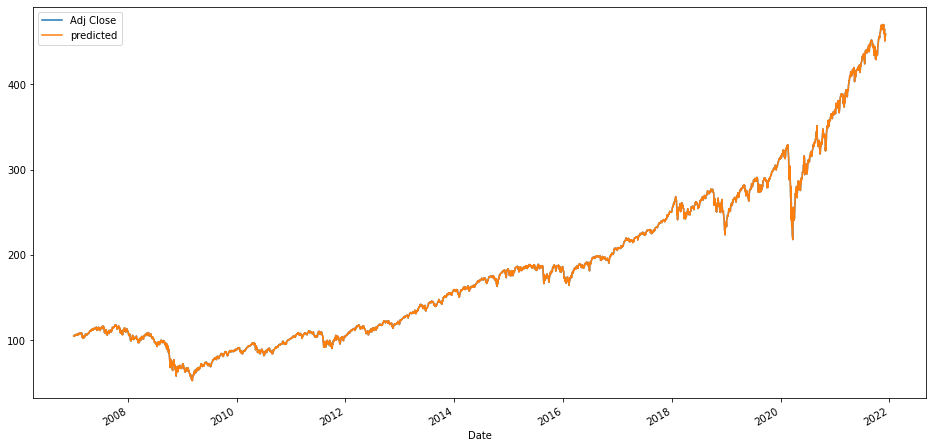

In [237]:
spy.get(['Adj Close','predicted']).plot(kind='line',figsize=(16,8))

In [246]:
# Getting the predicted stock price of 2017
dataset_train = spy.iloc[:2500, 1:2]
dataset_test = spy.iloc[2500:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 1319):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(1259, 60, 1)


In [248]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [249]:
spy.iloc[60]

High         1.428400e+02
Low          1.405600e+02
Open         1.422400e+02
Close        1.420000e+02
Volume       1.281941e+08
Adj Close    1.063368e+02
clean        1.280190e-01
predicted    1.063368e+02
Name: 2007-03-30 00:00:00, dtype: float64

In [250]:
len(predicted_stock_price)

1259

In [304]:
test_df= spy.iloc[2500:]

In [305]:
test_df= test_df.assign(pred=predicted_stock_price)

In [306]:
test_df

,High,Low,Open,Close,Volume,Adj Close,clean,predicted,pred
Date,,,,,,,,,
2016-12-06,221.740005,220.660004,221.220001,221.699997,59877400.0,202.427353,0.358593,202.427353,216.791046
2016-12-07,224.669998,221.380005,221.520004,224.600006,110738100.0,205.075226,0.364947,205.075226,216.928711
2016-12-08,225.699997,224.259995,224.570007,225.149994,99714400.0,205.577423,0.366152,205.577423,217.263214
2016-12-09,226.529999,225.369995,225.410004,226.509995,88005800.0,206.819214,0.369132,206.819214,217.935501
2016-12-12,226.960007,225.759995,226.399994,226.250000,102016100.0,206.581802,0.368562,206.581802,218.892136
...,...,...,...,...,...,...,...,...,...
2021-11-30,464.029999,455.299988,462.000000,455.559998,148559600.0,455.559998,0.965998,455.559998,342.619110
2021-12-01,464.670013,450.290009,461.640015,450.500000,131939200.0,450.500000,0.953857,450.500000,342.091705
2021-12-02,459.070007,450.309998,450.730011,457.399994,127637800.0,457.399994,0.970413,457.399994,341.429016


<AxesSubplot:xlabel='Date'>

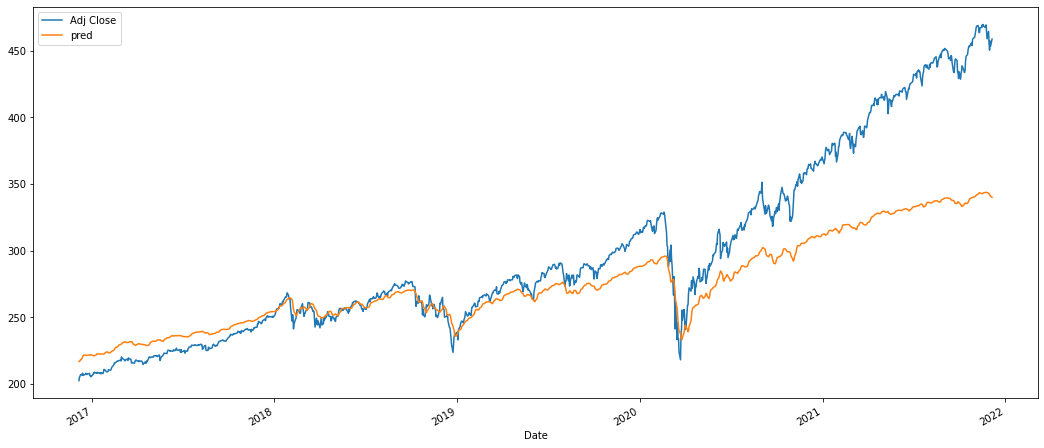

In [311]:
test_df.get(['Adj Close','pred']).plot(kind='line',figsize=(18,8))